In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Garv Khurana\Videos\Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().any()

False

In [12]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [26]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [27]:
wcss

[269981.28,
 186206.76002258612,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 37265.86520484346,
 35487.47296150882,
 31119.513605858352,
 21826.93630323165,
 23079.213599607938]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'wcss')

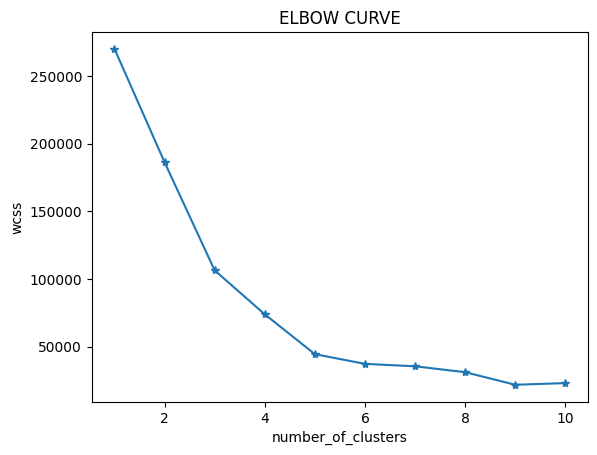

In [29]:
plt.plot(range(1,11),wcss,marker='*')
plt.title('ELBOW CURVE')
plt.xlabel('number_of_clusters')
plt.ylabel('wcss')

In [32]:
kmeans=KMeans(n_clusters=5,init='k-means++')
lables=kmeans.fit_predict(x)
lables


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

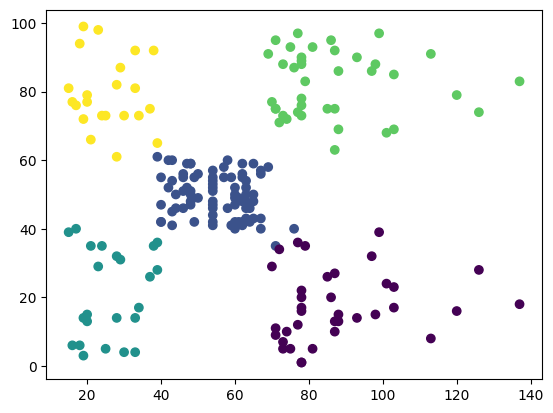

In [47]:
plt.scatter(x=x.iloc[:,0],y=x.iloc[:,1],c=lables)


In [46]:
kmeans.predict([[100,9]])

C:\Users\Garv Khurana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [49]:
import pickle
filename = 'customer.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)


In [76]:
from sklearn.cluster import DBSCAN
d=DBSCAN(eps=3,min_samples=3)

In [77]:
lab=d.fit_predict(x)

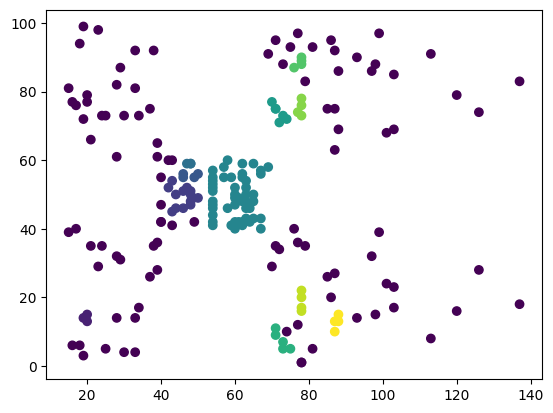

In [78]:
plt.scatter(x=x.iloc[:,0],y=x.iloc[:,1],c=lab)
